In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from pandas import DataFrame

def import_data(filename):
    data = pd.read_csv(filename, sep=',')
    return data

df = import_data('../../datasets_clean/demographics.csv')
df['zip'] = df['zip'].apply(lambda x: '{0:0>5}'.format(x))
df

,Unnamed: 0,zip,po_name,pop2010,pop2013,white,black,ameri_es,asian,hawn_pi,...,households,ave_hh_sz,hsehld_1_m,hsehld_1_f,marhh_chd,marhh_no_c,mhh_child,fhh_child,families,ave_fam_sz
0,72,02467,Chestnut Hill,21982,22057,17100,863,14,3157,6,...,5900,2.52,601,1271,1664,1791,61,245,4021,3.04
1,337,02119,Roxbury,25095,25547,4061,14748,233,382,15,...,9898,2.43,2037,2125,887,987,255,2214,5707,3.16
2,339,02121,Dorchester,25566,26160,1942,18056,187,198,10,...,9546,2.67,1397,1789,932,805,314,2922,6328,3.28
3,340,02122,Dorchester,22215,22342,8353,6434,75,3794,13,...,7786,2.80,1457,1390,1348,1122,285,1251,4902,3.45
4,342,02125,Dorchester,34002,35298,11570,10534,155,3643,29,...,12187,2.70,2683,2392,1569,1654,383,2116,7078,3.38
5,369,02113,Boston,6455,6478,6110,45,13,164,3,...,4056,1.59,1517,1850,117,384,7,36,686,2.42
6,370,02114,Boston,12093,12176,9743,819,14,1139,2,...,7013,1.57,2464,2863,366,1045,19,82,1685,2.40
7,371,02115,Boston,26697,27239,18401,2295,67,4091,13,...,10128,1.73,3847,4116,364,1035,43,370,2158,2.58
8,372,02116,Boston,20161,20496,15538,1192,24,2666,3,...,10808,1.62,3710,3877,686,2050,42,178,3214,2.50
9,374,02118,Boston,26610,27320,13744,5462,93,4036,10,...,12465,1.95,4465,3469,974,1684,123,1085,4527,2.94


In [3]:
# https://levelup.gitconnected.com/visualizing-housing-data-with-folium-maps-4718ed3452c2
import folium
import json
import numpy as np

def get_center_latlong(df):
    #center lat long of boston
    return (42.361145, -71.057083)
    
def plot_demographic_heatmap(df,col, output_path):
    # this line just to force our dataset zipcodes from numbers to strings so they match our geojson file
    df['zip'] = df['zip'].astype('str')


    # load my geojson file which contains my Polygons
    boundary_file = '../../datasets_clean/Boston_ZIP_Codes.geojson'
    with open(boundary_file, 'r') as f:
        zipcode_boundary = json.load(f)


    # Grab my map center again using our created fucntion (same as before)
    center = get_center_latlong(df)


    # Initialize Folium Map again (same as before)
    m = folium.Map(location=center, 
                   zoom_start=10)


    # Use the groupby method to 
    zipcode_data = df.groupby('zip').aggregate(np.mean)
    zipcode_data.reset_index(inplace = True)


    # Create choropleth map  
    folium.Choropleth(
        geo_data=zipcode_boundary,
        name='choropleth',
        data=zipcode_data,
        columns=['zip', col],
        key_on='feature.properties.ZIP5',
        fill_color='Spectral',
        fill_opacity=0.6,
        nan_fill_opacity=0,
        line_opacity=1,
        legend_name='Avg Population Density'
    ).add_to(m)


    m.save(output_path)

In [4]:
print(df.columns)
print(df['zip'])

Index(['Unnamed: 0', 'zip', 'po_name', 'pop2010', 'pop2013', 'white', 'black',
       'ameri_es', 'asian', 'hawn_pi', 'hispanic', 'other', 'mult_race',
       'males', 'females', 'age_under5', 'age_5_9', 'age_10_14', 'age_15_19',
       'age_20_24', 'age_25_34', 'age_35_44', 'age_45_54', 'age_55_64',
       'age_65_74', 'age_75_84', 'age_85_up', 'med_age', 'med_age_m',
       'med_age_f', 'households', 'ave_hh_sz', 'hsehld_1_m', 'hsehld_1_f',
       'marhh_chd', 'marhh_no_c', 'mhh_child', 'fhh_child', 'families',
       'ave_fam_sz'],
      dtype='object')
0     02467
1     02119
2     02121
3     02122
4     02125
5     02113
6     02114
7     02115
8     02116
9     02118
10    02126
11    02127
12    02128
13    02129
14    02130
15    02131
16    02132
17    02136
18    02134
19    02135
20    02108
21    02109
22    02110
23    02111
24    02163
25    02210
26    02199
27    02215
Name: zip, dtype: object


In [5]:
#plot demographic heat maps
plot_demographic_heatmap(df,'hispanic','maps/ethnicity/hispanic.html')
plot_demographic_heatmap(df,'white','maps/ethnicity/white.html')
plot_demographic_heatmap(df,'black','maps/ethnicity/black.html')
plot_demographic_heatmap(df,'ameri_es','maps/ethnicity/ameri_es.html')
plot_demographic_heatmap(df,'asian','maps/ethnicity/asian.html')
plot_demographic_heatmap(df,'hawn_pi','maps/ethnicity/hawn_pi.html')
plot_demographic_heatmap(df,'hispanic','maps/ethnicity/hispanic.html')
plot_demographic_heatmap(df,'other','maps/ethnicity/other.html')
plot_demographic_heatmap(df,'mult_race','maps/ethnicity/mult_race.html')


In [6]:
#graph population
plot_demographic_heatmap(df,'pop2013','maps/pop2013.html')

hispanic      1751
white        14754
black          877
ameri_es        40
asian         4251
hawn_pi         10
other          466
mult_race      466
Name: 02215, dtype: object


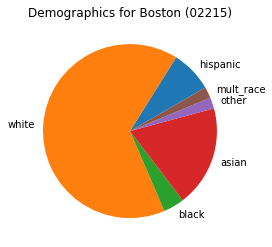

In [22]:
# https://stackoverflow.com/questions/41787006/making-multiple-pie-charts-out-of-a-pandas-dataframe-one-for-each-row/41787990
def demographic_by_zip(df, zipcode='total'):
    df_race = df[['zip', 'po_name', 'hispanic','white','black','ameri_es','asian','hawn_pi','other','mult_race']]

    if zipcode == 'total':
        row = df_race.set_index('zip').drop('po_name', axis=1).sum()
        town_name = 'Boston'
    else:
        row = df_race.set_index('zip').loc[zipcode]
        town_name = df.set_index('zip').loc[zipcode]['po_name']
        row.drop('po_name', inplace=True)

    print(row)
    row = row[row.gt(row.sum() * .01)]
    plt.pie(row, labels=row.index, startangle=30)
    plt.title(f'Demographics for {town_name} ({zipcode})')
    plt.show()

demographic_by_zip(df, '02215')

During our presentations, 4 major zipcodes were singled out as having a lack of amenities: 02126 (Mattapan), 02130 (Jamaica Plain), 02132 (West Roxbury), 02136 (Hyde Park)

hispanic      2833
white         1565
black        19971
ameri_es       133
asian          237
hawn_pi          9
other         1276
mult_race     1276
Name: 02126, dtype: object


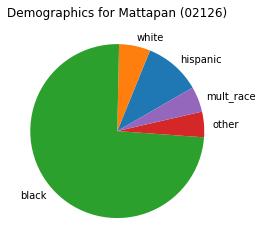

hispanic      7717
white        23025
black         4819
ameri_es       196
asian         1705
hawn_pi          8
other         3162
mult_race     3162
Name: 02130, dtype: object


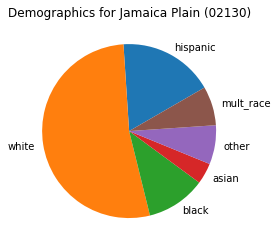

hispanic      7603
white        17199
black         7111
ameri_es       163
asian          849
hawn_pi         12
other         3293
mult_race     3293
Name: 02131, dtype: object


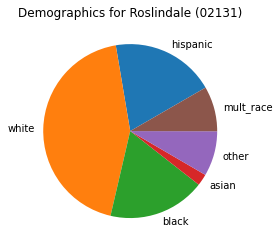

hispanic      1946
white        22433
black         1717
ameri_es        47
asian         1907
hawn_pi          8
other          682
mult_race      682
Name: 02132, dtype: object


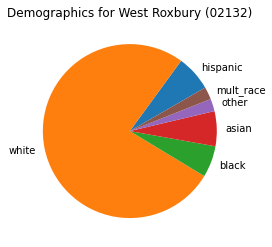

hispanic      6447
white        10834
black        14222
ameri_es       134
asian          530
hawn_pi         21
other         2923
mult_race     2923
Name: 02136, dtype: object


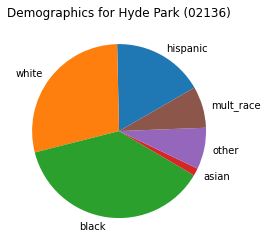

hispanic      1182
white        17100
black          863
ameri_es        14
asian         3157
hawn_pi          6
other          253
mult_race      253
Name: 02467, dtype: object


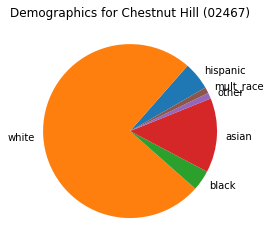

In [23]:
demographic_by_zip(df, '02126')
demographic_by_zip(df, '02130')
demographic_by_zip(df, '02131')
demographic_by_zip(df, '02132')
demographic_by_zip(df, '02136')
demographic_by_zip(df, '02467')

hispanic      97261
white        327144
black        118199
ameri_es       2060
asian         52675
hawn_pi         252
other         46423
mult_race     46423
dtype: int64


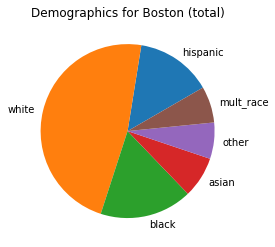

In [24]:
demographic_by_zip(df)